In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
housing0=pd.read_csv('housing.csv')
housing0.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing0.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing0.shape

(20640, 10)

In [8]:
housing0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

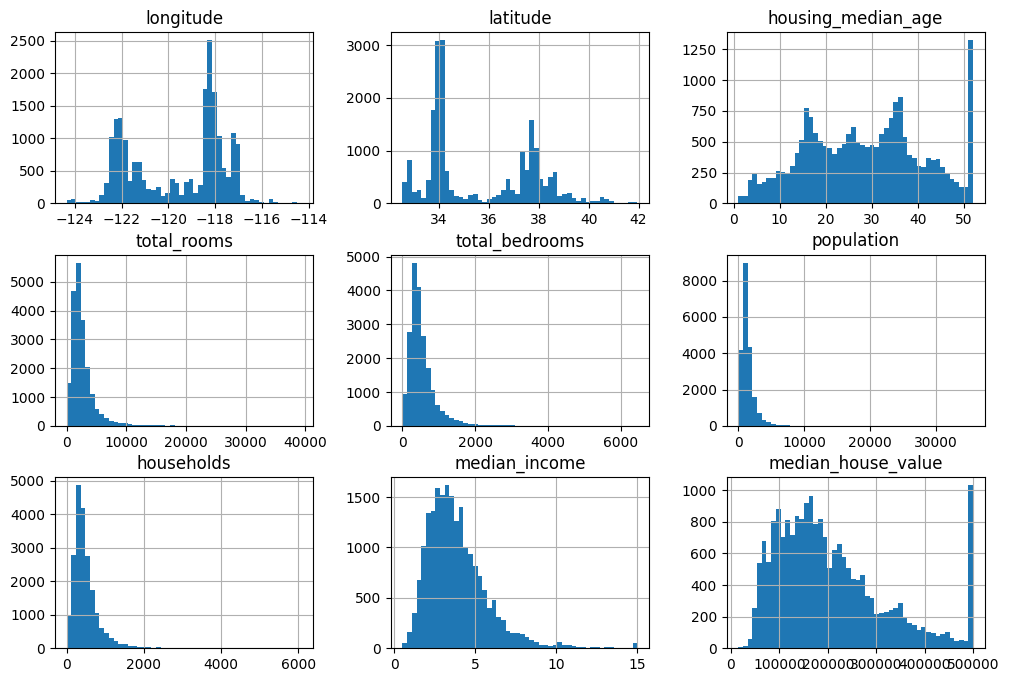

In [9]:
housing0.hist(bins=50,figsize=(12,8))

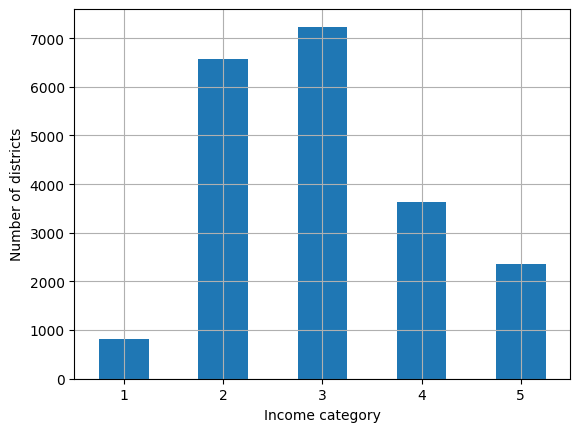

'\nCreates a new column income_cat by binning median_income into 5 categories (1 to 5).\n\npd.cut() splits continuous data into intervals or bins.\n\nThe bins argument defines the ranges of income:\n\n[0., 1.5) → category 1\n\n[1.5, 3.0) → category 2\n\n[3.0, 4.5) → category 3\n\n[4.5, 6.0) → category 4\n\n[6.0, ∞) → category 5\n'

In [10]:
# the medium_income has outliers after 5 and most values  are distriputed between 1.5 and 6
# this column will be used for statfied train and test data 
housing0["income_cat"] = pd.cut(housing0["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])

housing0["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

"""
Creates a new column income_cat by binning median_income into 5 categories (1 to 5).

pd.cut() splits continuous data into intervals or bins.

The bins argument defines the ranges of income:

[0., 1.5) → category 1

[1.5, 3.0) → category 2

[3.0, 4.5) → category 3

[4.5, 6.0) → category 4

[6.0, ∞) → category 5
"""


In [11]:
print(housing0['income_cat']) # cateorized income 
print(housing0.shape)

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]
(20640, 11)


In [12]:
housing0.shape

(20640, 11)

In [13]:
housing0.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [14]:
# taking a copy from the data
housing1=housing0.copy()
housing1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [15]:
# to distribute the income cat into  the data set and test set as original data 

trainData, testData = train_test_split(housing1, test_size=0.2, stratify=housing1["income_cat"], random_state=42)

In [16]:
# measure each category contribution in the test data 
# 3 category --> 3   0.350533 --> 35% contribution
testData['income_cat'].value_counts()/len(testData)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [17]:
# measure each category contribution in the whole data 
# 4 category --> 4   0.176308 --> 17% contribution
housing1['income_cat'].value_counts()/len(housing1)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

## Explore and Visualize the Data to Gain Insights


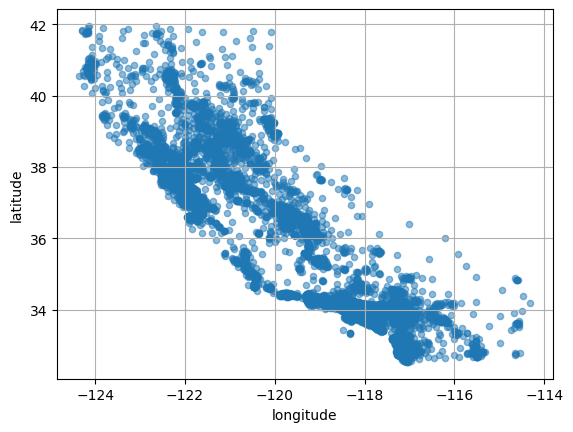

In [18]:

housing1.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.5)
plt.show()

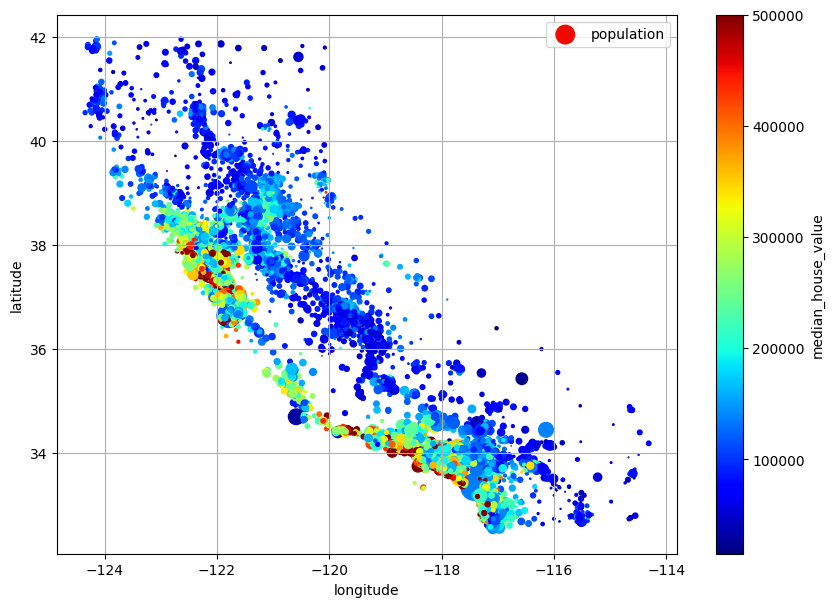

In [19]:
housing1.plot(kind="scatter", x="longitude", y="latitude", grid=True,s=housing1["population"] / 100, label="population",c="median_house_value", cmap="jet", colorbar=True,
legend=True, sharex=False, figsize=(10, 7))
plt.show()



In [20]:
#we have droped ocaen data because they are not numerical data 
corr_matrix = housing1.drop(columns=["ocean_proximity",'income_cat'],axis=1).corr()


In [21]:
corr_matrix['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

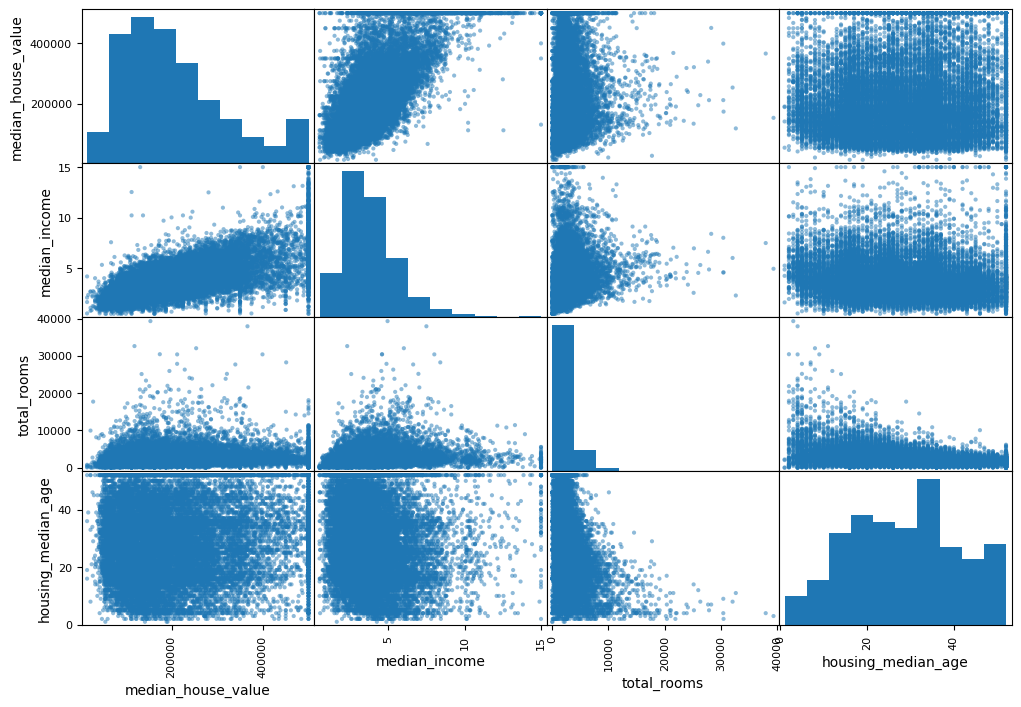

In [22]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing1[attributes], figsize=(12, 8))
plt.show()

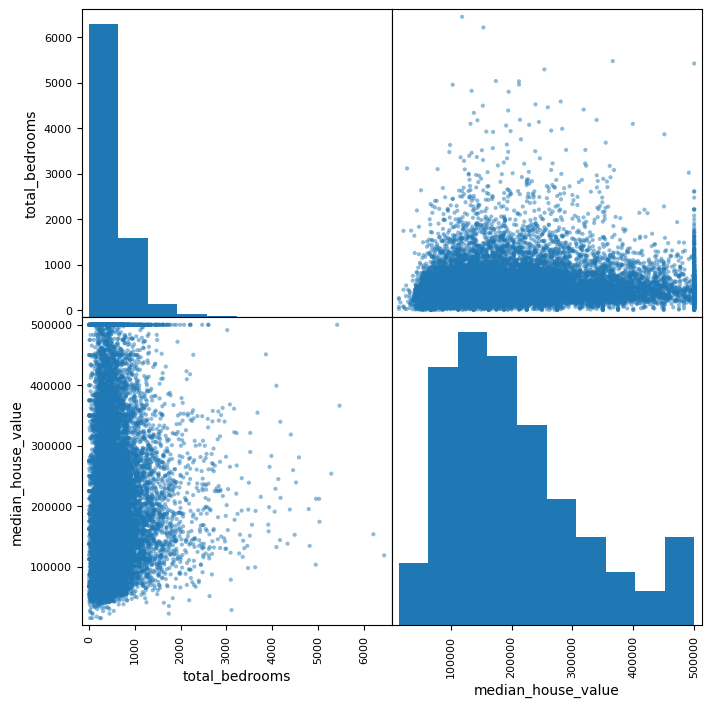

In [23]:
## to measure correlation between two features
scatter_matrix(housing1[["total_bedrooms","median_house_value"]],figsize=(8,8))
plt.show()


### from the previous correlation of median_house_value its noteced that there are some  features has nearly  no effect
### so we will do some transformations for it 


In [24]:
housing1["rooms_per_house"]  =  housing1["total_rooms"] / housing1["households"]
housing1["bedrooms_ratio"]   =  housing1["total_bedrooms"] / housing1["total_rooms"]
housing1["people_per_house"] =  housing1["population"] / housing1["households"]

In [25]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## Prepare the Data for Machine Learning Algorithms p96 pdf

In [26]:
housing2 = trainData.drop("median_house_value", axis=1)
housing_labels = trainData["median_house_value"].copy()


### Clean the Data

In [27]:
housing2.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
ocean_proximity         0
income_cat              0
dtype: int64

In [28]:
## fill the null values
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

In [29]:
import numpy as np
housing2_num=housing2.select_dtypes(include=[np.number]) # select just numerical data

In [30]:
X=imputer.fit_transform(housing2_num)

In [31]:
X_df=pd.DataFrame(X,columns=housing2_num.columns,index=housing2_num.index)
X_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [32]:
X_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [33]:
ocean=housing2[['ocean_proximity']].head(8) #page99

### OrdinalEncoder:
Converts each category into a single integer.
Example: ["red", "blue", "green"] → [0, 1, 2].
Output is a single column of integers.

### OneHotEncoder:
Converts each category into a binary vector (one-hot encoding).
Example: ["red", "blue", "green"] → [[1, 0, 0], [0, 1, 0], [0, 0, 1]].
Output is multiple binary columns (one per category).


# When to Use Which?
### Use OrdinalEncoder when:
The categorical data has an inherent order (e.g., ["low", "medium", "high"]).
You’re using tree-based models that can interpret ordinal relationships.
You want to keep the dimensionality low.

### Use OneHotEncoder when:
The categorical data is nominal (no inherent order, e.g., ["red", "blue", "green"]).
You’re using linear models or neural networks that cannot interpret ordinal relationships.
You don’t mind increasing the dimensionality of your dataset.


### OrdinalEncoder

In [34]:
from sklearn.preprocessing import OrdinalEncoder # Converts Categories to Integers (it is not the same with pd.cut that convert !!!numerical cts to sts)
ordEn=OrdinalEncoder()
ordencodded=ordEn.fit_transform(ocean)
ordencodded

array([[2.],
       [0.],
       [1.],
       [1.],
       [3.],
       [1.],
       [0.],
       [2.]])

In [35]:
ordEn.categories_

[array(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)]

### OneHotEncoder

In [36]:
from sklearn.preprocessing import OneHotEncoder
ohE=OneHotEncoder(sparse_output =False) # this parmeter convert the output into an array directly 
onhtencodded=ohE.fit_transform(ocean)
onhtencodded

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [37]:
ohE.categories_

[array(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)]

## Feature Scaling and Transformation

### MinMaxScaler

In [38]:
from sklearn.preprocessing import MinMaxScaler
MMsclr=MinMaxScaler(feature_range=(-1,1))
MMscaled=MMsclr.fit_transform(housing2_num)
MMscaled

array([[-0.60851927,  0.11702128,  1.        , ..., -0.80701754,
        -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, ..., -0.91866029,
        -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, ..., -0.93141946,
        -0.92458466, -0.73336919],
       ...,
       [ 0.47870183, -0.99148936, -0.52941176, ..., -0.65513434,
        -0.71663244, -0.50873781],
       [ 0.20689655, -0.6787234 ,  0.41176471, ..., -0.78873758,
        -0.68751167, -0.49716556],
       [-0.60649087,  0.08723404,  0.68627451, ..., -0.91669734,
        -0.92122457, -0.61608805]], shape=(16512, 8))

### StandardScaler

In [39]:
from sklearn.preprocessing import StandardScaler
SSsclr=StandardScaler()
SSscaled=SSsclr.fit_transform(housing2_num)
SSscaled

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]], shape=(16512, 8))

### RPF p106

In [40]:
from sklearn.metrics.pairwise import rbf_kernel # The Radial Basis Function (RBF) kernel measures similarity based on Euclidean distance.
age_simil_35 = rbf_kernel(housing0[["housing_median_age"]], [[35]], gamma=0.1)
print(age_simil_35)
"""
the output represents the similarity between each value of the housing_median_age feature in the dataset and the value 35,
calculated using the Radial Basis Function (RBF) kern
"""

[[2.73237224e-02]
 [3.07487988e-09]
 [2.81118530e-13]
 ...
 [8.48904403e-15]
 [2.81118530e-13]
 [2.09879105e-16]]


'\nthe output represents the similarity between each value of the housing_median_age feature in the dataset and the value 35,\ncalculated using the Radial Basis Function (RBF) kern\n'

## How to see the real predictions if we did some transformation on target values

#### 1- Using inverse transform

In [41]:
# if we did something(like scaling) on target values we use sklearn inverse_transform to get the real prediction vlaue 
from sklearn.linear_model import LinearRegression
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())
model = LinearRegression()
model.fit(housing2[["median_income"]], scaled_labels)
some_new_data = housing2[["median_income"]].iloc[:5] # pretend this is new data
scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

print('Prediction before inverse ' ,scaled_predictions) #scaled
print()
print('predictions after doing inverse transform ',predictions) #non scaled

Prediction before inverse  [[-0.64466228]
 [ 0.80674175]
 [-0.52302364]
 [-0.5853166 ]
 [-0.12415952]]

predictions after doing inverse transform  [[131997.15275877]
 [299359.35844434]
 [146023.37185694]
 [138840.33653057]
 [192016.61557639]]


#### 2 - TransformedTargetRegressor

In [42]:
# instead doing scaling manual then inverse it again there is a sklearn module do this 
from sklearn.compose import TransformedTargetRegressor
model = TransformedTargetRegressor(LinearRegression(),transformer=StandardScaler())
model.fit(housing2[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)
print(predictions)

[131997.15275877 299359.35844434 146023.37185694 138840.33653057
 192016.61557639]


#### 3 - FunctionTransformer

In [43]:
# the previous transfomer converet only scaled data but if we need custom transfomration
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing2[["population"]])
log_pop


,population
13096,7.362645
14973,6.501290
3785,6.331502
14689,7.520235
20507,7.555905
...,...
14207,6.843750
13105,7.257708
19301,7.942362
19121,7.452982


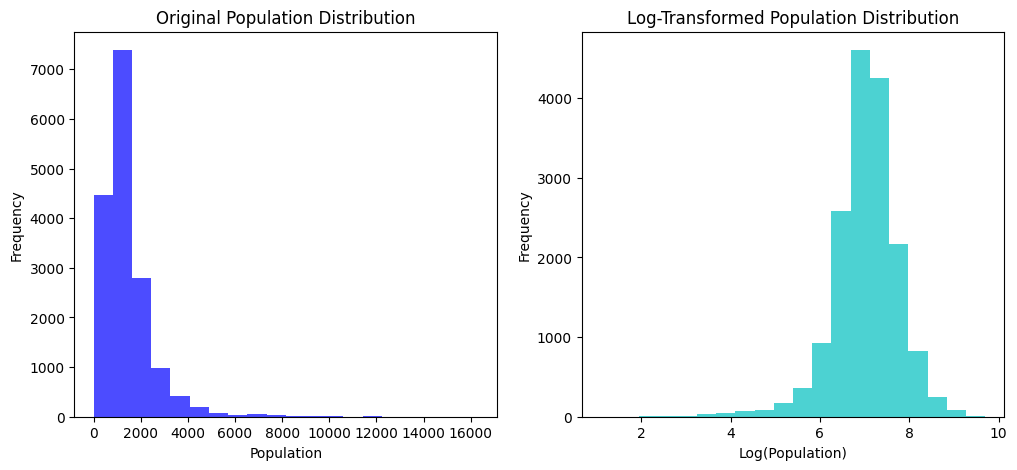

In [44]:
# Plot histogram to compare distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original data distribution
axes[0].hist(housing2["population"], bins=20, color='blue', alpha=0.7)
axes[0].set_title("Original Population Distribution")
axes[0].set_xlabel("Population")
axes[0].set_ylabel("Frequency")

# Log-transformed data distribution
axes[1].hist(log_pop, bins=20, color='c', alpha=0.7)
axes[1].set_title("Log-Transformed Population Distribution")
axes[1].set_xlabel("Log(Population)")
axes[1].set_ylabel("Frequency")

plt.show()


In [45]:
rbf_transformer = FunctionTransformer(rbf_kernel,kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing2[["housing_median_age"]])
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]], shape=(16512, 1))

In [46]:
# The Radial Basis Function (RBF) kernel measures similarity based on Euclidean distance So it -> has no inverse 
sf_coords = 37.7749, -122.41  # Latitude and longitude of San Francisco
sf_transformer = FunctionTransformer(rbf_kernel,kw_args=dict(Y=[sf_coords], gamma=0.1))  # Y is the reference point (San Francisco))
sf_simil = sf_transformer.transform(housing2[["latitude", "longitude"]])
sf_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]], shape=(16512, 1))

# Custom Transformation p(107,79)

### 1- Transfomring features that not requires (fit , transform)

In [47]:
housing3=pd.read_csv('housing.csv')
housing3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [48]:
## Examlpe One
## using FunctionTransformer 
from sklearn.preprocessing import FunctionTransformer
log_trans=FunctionTransformer(np.log,inverse_func=np.exp)
print(housing3['population']) # before 
print()
print(log_trans.transform(housing3[['population']])) # after 

0         322.0
1        2401.0
2         496.0
3         558.0
4         565.0
          ...  
20635     845.0
20636     356.0
20637    1007.0
20638     741.0
20639    1387.0
Name: population, Length: 20640, dtype: float64

       population
0        5.774552
1        7.783641
2        6.206576
3        6.324359
4        6.336826
...           ...
20635    6.739337
20636    5.874931
20637    6.914731
20638    6.608001
20639    7.234898

[20640 rows x 1 columns]


In [49]:
## Example 2 meesure similarity between housing_meadian_age and 35
from sklearn.metrics.pairwise import rbf_kernel
rbf_transformer = FunctionTransformer(rbf_kernel,kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing3[["housing_median_age"]])
print(housing3['housing_median_age']) ## before
print('\n')
print(age_simil_35) #after 

0        41.0
1        21.0
2        52.0
3        52.0
4        52.0
         ... 
20635    25.0
20636    18.0
20637    17.0
20638    18.0
20639    16.0
Name: housing_median_age, Length: 20640, dtype: float64


[[2.73237224e-02]
 [3.07487988e-09]
 [2.81118530e-13]
 ...
 [8.48904403e-15]
 [2.81118530e-13]
 [2.09879105e-16]]


#### Example 2 <br>
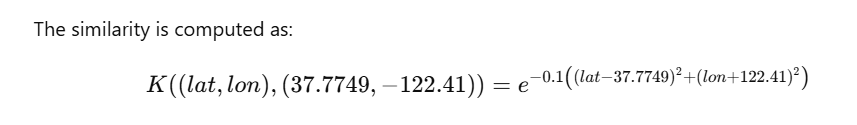

In [50]:
## Example 2 calculates how geographically similar each house's location is to San Francisco.
sf_coords = 37.7749, -122.41  #  San Francisco. location
sf_transformer = FunctionTransformer(rbf_kernel,kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing3[["latitude", "longitude"]])
sf_simil


array([[0.99566482],
       [0.99567518],
       [0.99655196],
       ...,
       [0.6599801 ],
       [0.6752005 ],
       [0.67616077]], shape=(20640, 1))

In [51]:
## Example 3 calculate ratio between two columns (first and second columns)
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

# Second Method Class method
when we need to make a transformation but we need to train on (fit and transform) we use class methos where fit and transform  <br>
are two methods of this class

In [52]:
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # No *args or **kwargs needed!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # 'y' is required by sklearn API, but not used
        X = check_array(X)  # Ensures X is a valid array with finite float values
        self.mean_ = X.mean(axis=0)  # Compute mean for each feature
        self.scale_ = X.std(axis=0)  # Compute standard deviation for each feature
        self.n_features_in_ = X.shape[1]  # Store the number of features
        return self  # Always return self!

    def transform(self, X):
        check_is_fitted(self)  # Ensures 'fit()' was called before 'transform()'
        X = check_array(X)  # Validate input data
        assert self.n_features_in_ == X.shape[1]  # Ensure same feature count

        if self.with_mean:
            X = X - self.mean_  # Subtract the mean if 'with_mean=True'

        return X / self.scale_  # Scale by standard deviation
    
########### exMPLE ########
# Step 1: Create Sample Data
X = np.array([[10, 200],  [20, 300], [30, 400]])

print("Original Data:")
print(X)

# Step 2: Initialize and Fit the Transformer
scaler = StandardScalerClone(with_mean=True)
scaler.fit(X)

# Step 3: Transform Data
X_transformed = scaler.transform(X)
print("\nStandardized Data:")
print(X_transformed)

# Step 4: Check Mean and Standard Deviation
print("\nComputed Mean:")
print(scaler.mean_)

print("\nComputed Standard Deviation:")
print(scaler.scale_)

# Step 5: Using in a Pipeline
pipeline = Pipeline([ ('scaler', StandardScalerClone())])

# Fit and transform using the pipeline
X_pipeline_transformed = pipeline.fit_transform(X)
print("\nStandardized Data from Pipeline:")
print(X_pipeline_transformed)

Original Data:
[[ 10 200]
 [ 20 300]
 [ 30 400]]

Standardized Data:
[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]

Computed Mean:
[ 20. 300.]

Computed Standard Deviation:
[ 8.16496581 81.64965809]

Standardized Data from Pipeline:
[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


# Pipeline In sklearn

#### when we want to do some operation on data (pipeline) we can do them separately or using ( pipeline or make_pipeline )

##### 1- pipeline 

In [ ]:
# Enable diagram display
from sklearn import set_config
set_config(display="diagram")

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


pipeline = Pipeline([("impute", SimpleImputer(strategy="median")),("standardize", StandardScaler()),]) # making imputing and standarizing
print(pipeline.fit_transform(housing3[['median_house_value']])) ## applying pipeline on median_house_value  (impute then StandarScale)
pipeline # show the diagram of pipeline 

[[ 2.12963148]
 [ 1.31415614]
 [ 1.25869341]
 ...
 [-0.99274649]
 [-1.05860847]
 [-1.01787803]]


,steps,"[('impute', ...), ('standardize', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


### 2- make_pipeline  (same as pipeline but has no names )

In [54]:
from sklearn.pipeline import make_pipeline
mk_pip=make_pipeline(SimpleImputer(strategy='mean'),StandardScaler())
print(mk_pip.fit_transform(housing3[['median_house_value']]))
mk_pip


[[ 2.12963148]
 [ 1.31415614]
 [ 1.25869341]
 ...
 [-0.99274649]
 [-1.05860847]
 [-1.01787803]]


,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [55]:
## pip line can be considered as a list 
print(mk_pip[0])
print(pipeline[1])

SimpleImputer()
StandardScaler()


### ColumnTransformer --> is used to implement a pipeline for different datatypes of columns

In [56]:
from sklearn.compose import ColumnTransformer
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms","total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder(handle_unknown="ignore")) # pipeline for categorical data
num_pipeline=Pipeline([('imputer',SimpleImputer(strategy='mean'),('scaler',StandardScaler()))])  # pipeline for numerical data
#                                    name  pipelineer   piped columns
preprocessing = ColumnTransformer([("num", num_pipeline, num_attribs),("cat", cat_pipeline, cat_attribs)]) ## distribute pipeline on data 
print(preprocessing)
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer(),
                                                  ('scaler',
                                                   StandardScaler()))]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])


,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,steps,"[('imputer', ...)]"
,transform_input,None
,memory,None


#### we can ues make_column_selector to auto select specific data types of columns instead make a list of cols names as previous 

In [57]:
# we now can do pipeline to the whole colmn in dataframe without select the columns types they are auto selected by make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector ,make_column_transformer


# Now make_column_transformer will work
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)


housing3_processed=preprocessing.fit_transform(housing3)
housing3_processed.shape   


ValueError: too many values to unpack (expected 2)

### The full code to prepare our data (combine the previous topics)

In [ ]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
import numpy as np

""
housing4=pd.read_csv('housing.csv')

# Function to compute column ratio
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

# Function to name the transformed feature
def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # Output feature name

# Pipeline for ratio features
def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )

# Log transformation pipeline
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)


# Default numerical pipeline
default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

# Categorical pipeline (assumed to be defined elsewhere)
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('encoder', OneHotEncoder(handle_unknown="ignore"))
])

# ColumnTransformer combining all transformations
preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population","households", "median_income"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
], remainder=default_num_pipeline)  # Remaining column: "housing_median_age"

# Example usage with housing data
housing_prepared = preprocessing.fit_transform(housing4)
print(housing_prepared.shape)  # Should be (16512, 24)
print(preprocessing.get_feature_names_out())  # Output feature names


(20640, 17)
['bedrooms__ratio' 'rooms_per_house__ratio' 'people_per_house__ratio'
 'log__total_bedrooms' 'log__total_rooms' 'log__population'
 'log__households' 'log__median_income' 'cat__ocean_proximity_<1H OCEAN'
 'cat__ocean_proximity_INLAND' 'cat__ocean_proximity_ISLAND'
 'cat__ocean_proximity_NEAR BAY' 'cat__ocean_proximity_NEAR OCEAN'
 'remainder__longitude' 'remainder__latitude'
 'remainder__housing_median_age' 'remainder__median_house_value']


#  Select and Train a Model

# 1 - LinearRegression Model

In [ ]:
from sklearn.linear_model import LinearRegression
housing5=pd.read_csv('housing.csv')
housing5_features=housing5.drop(columns=['median_house_value'])
housing5_targets=housing5['median_house_value']
model=make_pipeline(preprocessing,LinearRegression())
model.fit(housing5_features,housing5_targets)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                                   StandardScaler())]),
                                                  ['total_bedrooms',
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002AA9196AED0>)])),
                ('linearregression', LinearRegression())])

In [ ]:
# the model prediction of our features
pred1=model.predict(housing5_features)
print(pred1[:5].round(-2))
print(housing5_targets[:5])

[369700. 370100. 360400. 325300. 289900.]
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


In [ ]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(pred1,housing5_targets) ## Underfitting
## the range of targets is thousands USD then 71k is larger error so this is Underfitting 
##  it can mean that the features do not provide enough information to make good predictions OR that the model is not powerful enough

71067.65016085753

In [ ]:
# to extract the model itself
model_extracted=model.named_steps['linearregression']
model_extracted

LinearRegression()

# 2- DecsionTree Model

In [ ]:
# we will try decsisioTree model 
from sklearn.tree import DecisionTreeRegressor ,plot_tree
DTreg=make_pipeline(preprocessing,DecisionTreeRegressor(random_state=42))
DTreg.fit(housing5_features,housing5_targets)
pred2=DTreg.predict(housing5_features)
print(pred2[0:5])
print(housing5_targets[0:5])
root_mean_squared_error(housing5_targets,pred2) ## overfit happens

[452600. 358500. 352100. 341300. 342200.]
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


0.0

In [ ]:

# Extract the trained DecisionTreeRegressor
tree_model = DTreg.named_steps['decisiontreeregressor']
tree_model

DecisionTreeRegressor(random_state=42)

## Evaluation by K-Fold

In [ ]:

from sklearn.model_selection import cross_val_score
tree_rmses = -cross_val_score(DTreg, housing5_features, housing5_targets,scoring="neg_root_mean_squared_error", cv=10)
tree_rmses

array([71691.54551884, 71229.06784967, 72319.06458645, 67687.11951972,
       70259.20514085, 64275.9023304 , 65207.22542119, 67571.10522179,
       69378.43214529, 71801.60214096])

In [ ]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     69142.026988
std       2849.425870
min      64275.902330
25%      67600.108796
50%      69818.818643
75%      71575.926102
max      72319.064586
dtype: float64

##### the mean root mean square = 69142.026988 and still high so we will use RandomForestRegressor

# 3- RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing,RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing5_features, housing5_targets,scoring="neg_root_mean_squared_error", cv=10)


In [ ]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     49213.216783
std       1699.470399
min      46119.705126
25%      48532.454404
50%      49300.940752
75%      50371.413587
max      51848.343638
dtype: float64

# GridSearch
#### use gridsearch to gest the best parameters for our model 

In [ ]:
from sklearn.model_selection import GridSearchCV
full_pipeline = Pipeline([("preprocessing", preprocessing),("random_forest", RandomForestRegressor(random_state=42)),])
## test which number of features of RandomForest Model (we can test another parameters also)
param_grid = [{'random_forest__max_features': [4, 6, 8]},]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,scoring='neg_root_mean_squared_error')
grid_search.fit(housing5_features, housing5_targets)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002AA9196AED0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'random_forest__max_features': [4, 6, 8]}],
             scoring='neg_root_mean_squared_error')

In [ ]:
grid_search.best_params_

{'random_forest__max_features': 6}

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([5.05995377, 7.25779192, 9.17949247]),
 'std_fit_time': array([0.16580661, 0.14438148, 0.10579901]),
 'mean_score_time': array([0.17129032, 0.19303759, 0.17837755]),
 'std_score_time': array([0.0042409 , 0.02115483, 0.01590977]),
 'param_random_forest__max_features': masked_array(data=[4, 6, 8],
              mask=[False, False, False],
        fill_value=999999),
 'params': [{'random_forest__max_features': 4},
  {'random_forest__max_features': 6},
  {'random_forest__max_features': 8}],
 'split0_test_score': array([-50480.39597887, -49927.77410904, -50251.81545979]),
 'split1_test_score': array([-48618.0143529 , -48110.44502221, -48756.24837957]),
 'split2_test_score': array([-48535.67595587, -48151.94471277, -48920.82092758]),
 'mean_test_score': array([-49211.36209588, -48730.05461467, -49309.62825565]),
 'std_test_score': array([897.97184441, 847.08501993, 669.60614126]),
 'rank_test_score': array([2, 1, 3])}

In [ ]:
# the detailed results (best chios) which has least mean_test_score 
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
[...]  # change column names to fit on this page, and show rmse = -score
cv_res  # note: the 1st column is the row ID

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,7.257792,0.144381,0.193038,0.021155,6,{'random_forest__max_features': 6},-49927.774109,-48110.445022,-48151.944713,-48730.054615,847.085020,1
0,5.059954,0.165807,0.171290,0.004241,4,{'random_forest__max_features': 4},-50480.395979,-48618.014353,-48535.675956,-49211.362096,897.971844,2
2,9.179492,0.105799,0.178378,0.015910,8,{'random_forest__max_features': 8},-50251.815460,-48756.248380,-48920.820928,-49309.628256,669.606141,3


## Rndomized Search 
#### Instead of exhaustively trying all combinations (like Grid Search), Randomized Search picks a random subset of hyperparameter combinations and evaluates them.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {'random_forest__max_features': randint(low=2, high=20)}
rnd_search = RandomizedSearchCV(full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,scoring='neg_root_mean_squared_error', random_state=42)
rnd_search.fit(housing5_features, housing5_targets)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x000002AA9196AED0>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AA918FD670>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
## extact the importance of each feature for the model
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
list(feature_importances)

[0.067430716255305,
 0.06891061514353226,
 0.10205979103754834,
 0.017575731741066507,
 0.018750897096262552,
 0.018269009826872327,
 0.017524065076815653,
 0.3183152085347203,
 0.013699418727360083,
 0.15278851542918112,
 0.0002165543152762577,
 0.0038275623105696625,
 0.005791456970671399,
 0.08202774588924396,
 0.0717970504055847,
 0.04101566123998986]

In [ ]:
## map the score of each feature 
sorted(zip(feature_importances,final_model["preprocessing"].get_feature_names_out()),reverse=True)

[(0.3183152085347203, 'log__median_income'),
 (0.15278851542918112, 'cat__ocean_proximity_INLAND'),
 (0.10205979103754834, 'people_per_house__ratio'),
 (0.08202774588924396, 'remainder__longitude'),
 (0.0717970504055847, 'remainder__latitude'),
 (0.06891061514353226, 'rooms_per_house__ratio'),
 (0.067430716255305, 'bedrooms__ratio'),
 (0.04101566123998986, 'remainder__housing_median_age'),
 (0.018750897096262552, 'log__total_rooms'),
 (0.018269009826872327, 'log__population'),
 (0.017575731741066507, 'log__total_bedrooms'),
 (0.017524065076815653, 'log__households'),
 (0.013699418727360083, 'cat__ocean_proximity_<1H OCEAN'),
 (0.005791456970671399, 'cat__ocean_proximity_NEAR OCEAN'),
 (0.0038275623105696625, 'cat__ocean_proximity_NEAR BAY'),
 (0.0002165543152762577, 'cat__ocean_proximity_ISLAND')]

# THIS  PART NEED TO BE REVIWED #######

In [ ]:
trainData,testData

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 13096    -122.42     37.80                52.0       3321.0          1115.0   
 14973    -118.38     34.14                40.0       1965.0           354.0   
 3785     -121.98     38.36                33.0       1083.0           217.0   
 14689    -117.11     33.75                17.0       4174.0           851.0   
 20507    -118.15     33.77                36.0       4366.0          1211.0   
 ...          ...       ...                 ...          ...             ...   
 14207    -118.40     33.86                41.0       2237.0           597.0   
 13105    -119.31     36.32                23.0       2945.0           592.0   
 19301    -117.06     32.59                13.0       3920.0           775.0   
 19121    -118.40     34.06                37.0       3781.0           873.0   
 19888    -122.41     37.66                44.0        431.0           195.0   
 
        population  households  median

In [ ]:
X_test = testData.drop("median_house_value", axis=1)
y_test = testData["median_house_value"].copy()
final_predictions = final_model.predict(X_test)
final_rmse = root_mean_squared_error(y_test, final_predictions)
print(final_rmse)  # prints 41424.40026462184

18397.105220243375


In [ ]:

#RRRRRRRRRRRRRRRRRRRRRREEEEEEEEEEEEREEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,                     
loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

array([17489.46000985, 19262.02869724])

In [ ]:
# save the model to use it  later 
import joblib
joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

In [ ]:
# load the model to use 
loaded_model = joblib.load("my_california_housing_model.pkl")
predictions = loaded_model.predict(X_test)
predictions

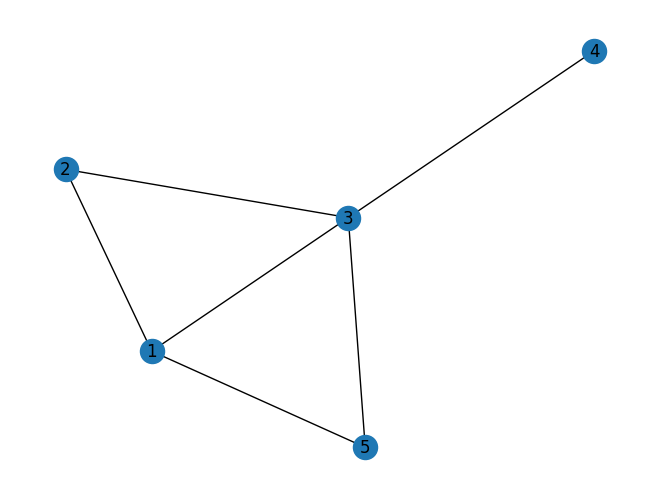

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 1), (3, 4),(3,5),(5,1)])

nx.draw(G, with_labels=True)
plt.show()
